In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [2]:
# Example of merging the datasets based on a common column (like CustomerID)
data = pd.merge(transactions, customers, on='CustomerID')

# Handle missing values
data.fillna(0, inplace=True)

# Normalize/Standardize the data if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


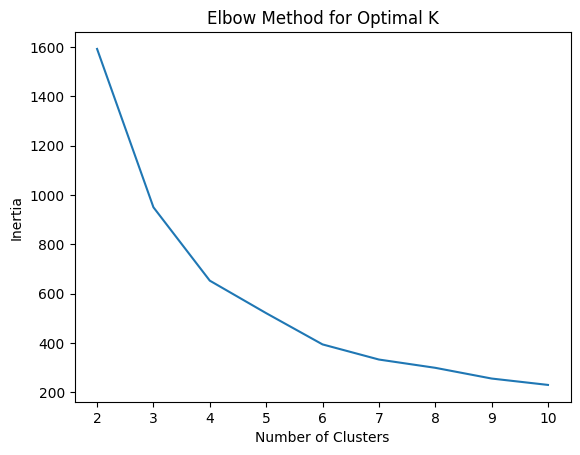

In [3]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (2 to 10)
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia to visualize the elbow method
import matplotlib.pyplot as plt

plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [4]:
# Fit the model with the optimal number of clusters
optimal_clusters = 4  # Replace with the determined number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


In [5]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.743702940359571


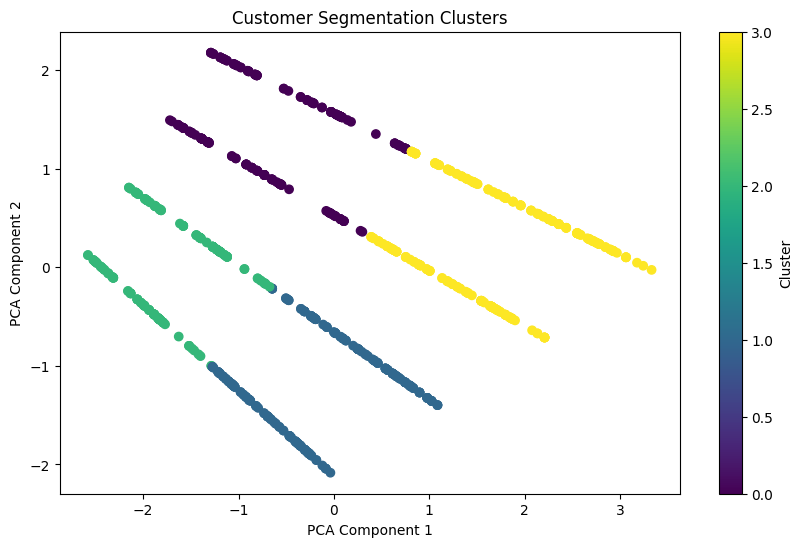

In [6]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [7]:
# Save the dataframe with clusters to a new CSV file
data.to_csv('Customer_Segmentation_Results.csv', index=False)
